In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("medical_examination.csv")

# Inspect first few rows
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
#Overweight Column
#If BMI > 25, the person is considered overweight (1), otherwise not overweight (0).
# Calculate BMI
df["BMI"] = df["weight"] / ((df["height"] / 100) ** 2)

# Create 'overweight' column
df["overweight"] = (df["BMI"] > 25).astype(int)

# Drop BMI column (optional)
df.drop(columns=["BMI"], inplace=True)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [8]:
#Normalize Cholesterol & Glucose
df["cholesterol"] = (df["cholesterol"] > 1).astype(int)
df["gluc"] = (df["gluc"] > 1).astype(int)

df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


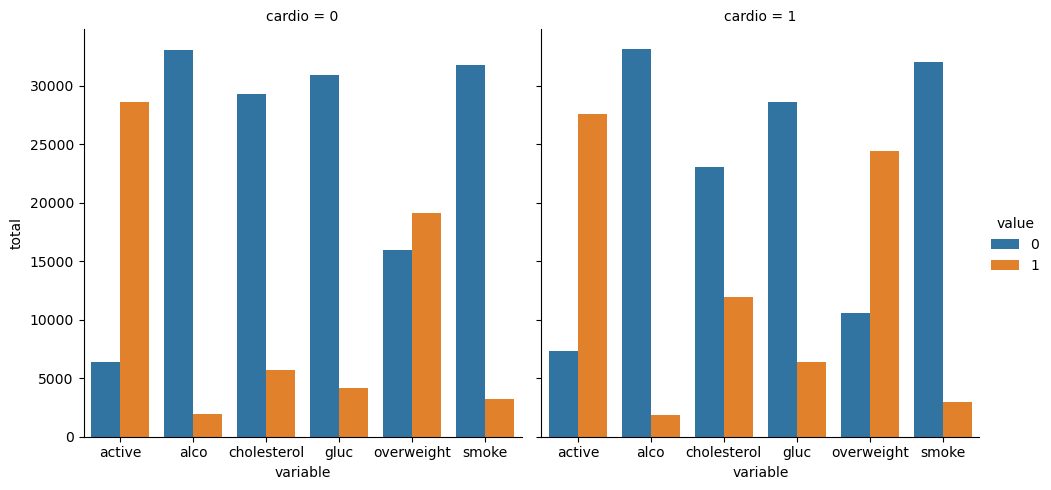

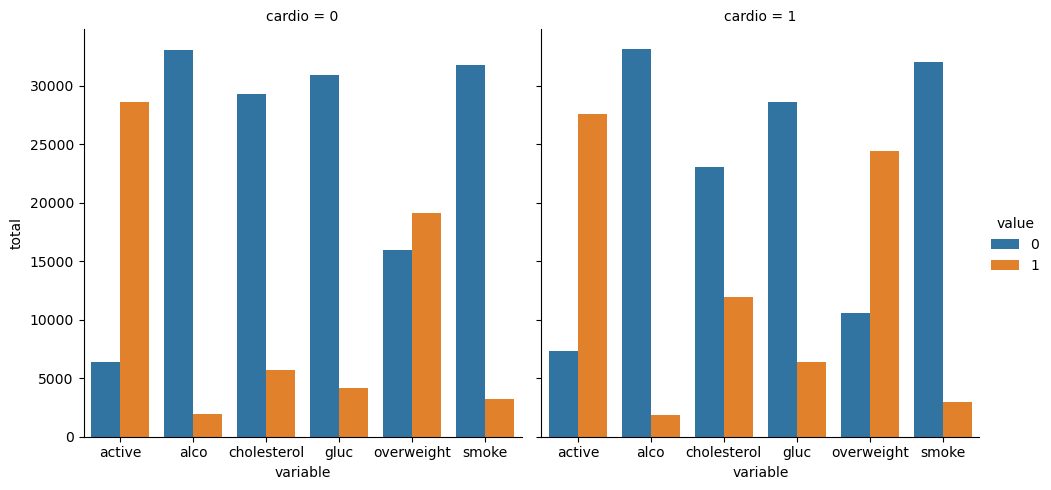

In [9]:
#Draw Categorical Plot
def draw_cat_plot():
    # Convert data to long format
    df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

    # Group data and count occurrences
    df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")

    # Create categorical plot
    g = sns.catplot(
        x="variable", y="total", hue="value", col="cardio",
        kind="bar", data=df_cat, height=5, aspect=1
    )

    # Get figure
    fig = g.fig

    return fig

# Display plot
draw_cat_plot()


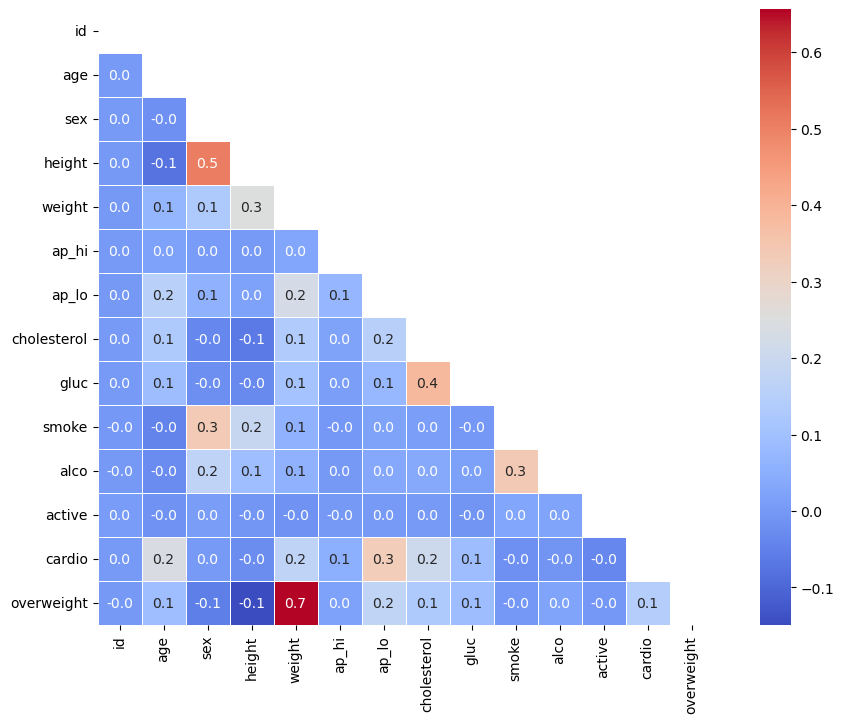

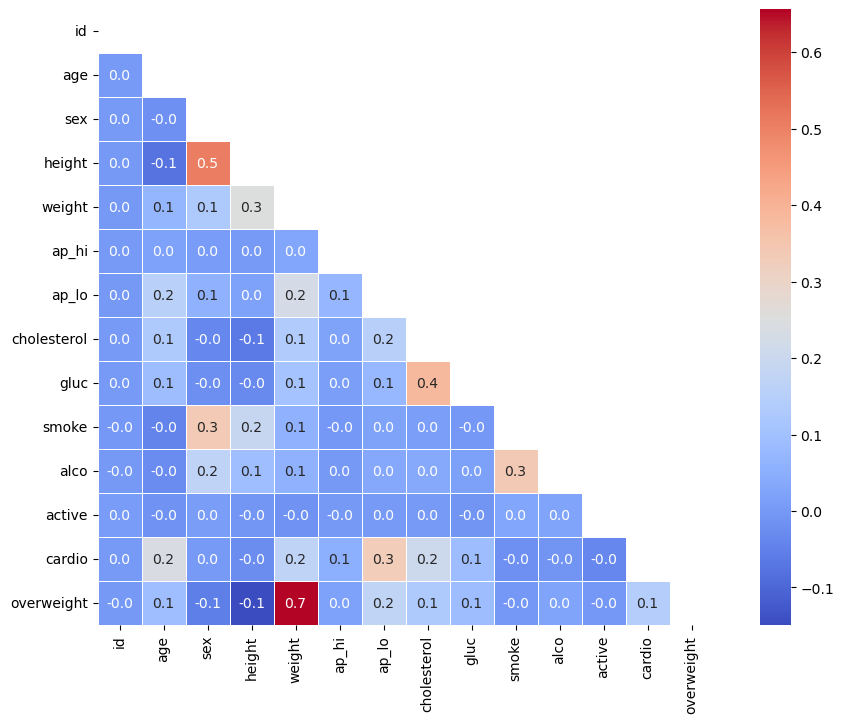

In [10]:
#Draw Heatmap
def draw_heat_map():
    # Clean data
    df_heat = df[
        (df["ap_lo"] <= df["ap_hi"]) & 
        (df["height"] >= df["height"].quantile(0.025)) & 
        (df["height"] <= df["height"].quantile(0.975)) & 
        (df["weight"] >= df["weight"].quantile(0.025)) & 
        (df["weight"] <= df["weight"].quantile(0.975))
    ]

    # Compute correlation matrix
    corr = df_heat.corr()

    # Generate mask for upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw heatmap
    sns.heatmap(
        corr, mask=mask, annot=True, fmt=".1f",
        cmap="coolwarm", linewidths=0.5, square=True
    )

    return fig

# Display heatmap
draw_heat_map()
